In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# AMATH 581 Homework 2
## Eric Leonard, ericcl@uw.edu

## Problem 1
The probability density evolution in a one-dimensional harmonic trapping potential is governed by the partial
differential equation:

$$i\hbar\psi_t + \frac{\hbar^2}{2m}\psi_{xx} − V(x)\psi = 0$$

where $\psi$ is the probability density and $V(x) = kx^2 / 2$ is the harmonic confining potential. A typical solution
technique for this problem is to assume a solution of the form

$$\psi = \sum_1^N a_n\phi_n(x)\exp{\left(−i\frac{E_n}{2\hbar}t\right)}$$

which is called an eigenfunction expansion solution ($\phi_n$ = eigenfunction, $E_n$ = eigenvalue). Plugging in this
solution ansatz to Eq. (1) gives the boundary value problem:

$$\frac{d^2\phi_n}{dx^2} − \left[Kx^2 − \varepsilon_n\right]\phi_n = 0$$

where we expect the solution $\phi_n(x) \to 0$ as $x \to \pm\infty$ and $\varepsilon_n$ is the quantum energy. Note here that $K = km/\hbar^2$
and $\varepsilon_n = E_n m/\hbar^2$. In what follows, take $K = 1$ and always normalize so that $\int_{-\infty}^\infty |\phi_n|^2dx = 1$.

**(a)** Calculate the first five normalized eigenfunctions $(\phi_n)$ and eigenvalues $(\varepsilon_n)$ using a shooting scheme. For
this calculation, use $x \in [−L, L]$ with $L = 4$ and choose $x_{span} = −L : 0.1 : L$. Save the absolute value of the
eigenfunctions in a 5-column matrix (column 1 is $\phi_1$, column 2 is $\phi_2$ etc.) and the eigenvalues in a 1x5 vector.

In [8]:
# Constants
K = 1  # given constant
L = 4  # boundary
x_span = np.arange(-L, L + 0.1, 0.1)  # Discretized space for x in [-L, L]
tol = 1e-6  # tolerance for the shooting method

# The second-order ODE rewritten as a system of first-order ODEs:
# ϕ[0] = ϕ_n(x)
# ϕ[1] = d(ϕ_n)/dx
def harmonic_oscillator_ode(ϕ, x, ϵ):
    return [ϕ[1], (K * x**2 - ϵ) * ϕ[0]]

# Normalization of eigenfunctions
def normalize(ϕ, x_span):
    norm = np.trapz(abs(ϕ)**2, x_span)
    return ϕ / np.sqrt(norm)

# Shooting method to find the eigenvalue epsilon
def shooting_method(ϵ, x_span, n, tol):
    dϵ = ϵ / 10 # used to adjust ϵ
    for i in range(1000): #while True:
        ϕ0 = [1, np.sqrt(K*(L)**2 - ϵ)] # initial conditions
        sol = odeint(harmonic_oscillator_ode, ϕ0, x_span, args=(ϵ,)) # solve system of ODEs 
        ϕ, dϕdx = sol[:, 0], sol[:, 1]
        ϕL, dϕdxL = ϕ[-1], dϕdx[-1]  # Value of ϕ_n(L) (boundary at x = L)

        # Check if the boundary condition is satisfied within the tolerance
        if abs(dϕdxL + np.sqrt(K*(L)**2 - ϵ) * ϕL) < tol:
            return ϵ
        
        # Update epsilon bounds based on the sign of the boundary value
        if (-1)**(n) * (dϕdxL + np.sqrt(K*L**2 - ϵ) * ϕL) > 0:
            ϵ += dϵ
        else:
            ϵ -= dϵ / 2
            dϵ /= 2
    return ϵ
    
# Main function to calculate the first five eigenfunctions and eigenvalues
def find_eigenfunctions(num_eigenfunctions, x_span, tol):
    eigenfunctions = np.zeros((len(x_span), num_eigenfunctions))
    eigenvalues = np.zeros(num_eigenfunctions)
    
    # Initial guesses for eigenvalues
    ϵ0 = [1, 3, 5, 7, 9]
    
    for n in range(num_eigenfunctions):
        ϵn = shooting_method(ϵ0[n], x_span, n, tol)
        ϕ0 = [1, np.sqrt(K*(L)**2 - ϵn)]
        ϕn = odeint(harmonic_oscillator_ode, ϕ0, x_span, args=(ϵn,))[:,0]
        ϕn = normalize(ϕn, x_span)
        
        eigenfunctions[:, n] = np.abs(ϕn) # Store absolute value of eigenfunctions
        eigenvalues[n] = ϵn
    
    return eigenfunctions, eigenvalues

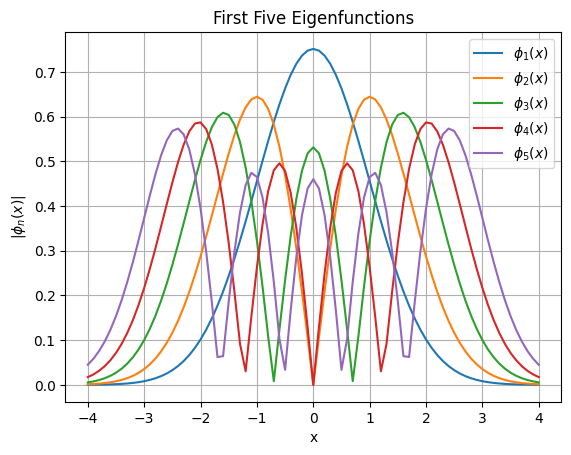

A2 (Eigenvalues):
[0.99999998 2.9999994  4.99998953 6.99988317 8.9990606 ]


In [9]:
# Calculate the first five eigenfunctions and eigenvalues
eigenfunctions, eigenvalues = find_eigenfunctions(5, x_span, tol)

# Display the results
A1 = eigenfunctions  # Absolute value of eigenfunctions
A2 = eigenvalues    # Eigenvalues

# Plot eigenfunctions
for n in range(5):
    plt.plot(x_span, eigenfunctions[:, n], label=f'$\\phi_{n+1}(x)$')
plt.title('First Five Eigenfunctions')
plt.xlabel('x')
plt.ylabel('$|\\phi_n(x)|$')
plt.legend()
plt.grid(True)
plt.show()

# Output results
print("A2 (Eigenvalues):")
print(A2)

In [10]:
A1

array([[2.56183470e-04, 1.45461736e-03, 5.66711043e-03, 1.74588473e-02,
        4.50516580e-02],
       [3.76940965e-04, 2.08377489e-03, 7.88695716e-03, 2.35399838e-02,
        5.86293688e-02],
       [5.51714864e-04, 2.96901781e-03, 1.09156754e-02, 3.15583001e-02,
        7.58483956e-02],
       [8.01216066e-04, 4.19588715e-03, 1.49786781e-02, 4.19281002e-02,
        9.71899058e-02],
       [1.15311660e-03, 5.87359613e-03, 2.03472413e-02, 5.51048286e-02,
        1.23080898e-01],
       [1.64382706e-03, 8.13893182e-03, 2.73391696e-02, 7.15653847e-02,
        1.53831231e-01],
       [2.32055909e-03, 1.11600069e-02, 3.63163648e-02, 9.17795041e-02,
        1.89559851e-01],
       [3.24364379e-03, 1.51394491e-02, 4.76780810e-02, 1.16171080e-01,
        2.30113233e-01],
       [4.48904553e-03, 2.03165046e-02, 6.18486348e-02, 1.45069151e-01,
        2.74981544e-01],
       [6.15097107e-03, 2.69674234e-02, 7.92584568e-02, 1.78649425e-01,
        3.23220531e-01],
       [8.34442598e-03, 3.5403

In [11]:
A2

array([0.99999998, 2.9999994 , 4.99998953, 6.99988317, 8.9990606 ])